# Project - Computer Vision #1
                                 by ARYAN JAIN

## PROJECT SUMMARY

<b>Domain:</b>
 Botanical research

<b>Context:</b>
    University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have have invested on curating sample
images. They require an automation which can create a classifier capable of determining a plant's species from a
photo
    
    
<b>Data Description:</b>    
    The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/plant-seedlings-classification/data    
    
<b>Objectives:</b>
    Create a classifier capable of determining a plant's species from a photo
 
<b>Key Tasks:</b>

    - Import the data. Analyse the dimensions of the data. Visualise the data.
    - Build image classifier models using ML, NN and CNN
    - Compare the results from different models
    - Pickle the best performing model
    - Import the the image to predict the class 
    - Display the image
    - Use best performing Classifier model to predict the class of the imported image

### Importing Libraries

#### Libraries for Data Management and Vizualisation

In [66]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### All necessary libraries and functions from sklearn

In [2]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Libraries for Deep Learning

In [3]:
# OpenCV and Tensorflow
import cv2
import tensorflow as tf

# For images
from tensorflow.python.keras.preprocessing.image import image
from tensorflow.python.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical

# Models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D

#### Convolutional Neural Networks

In [4]:
# Optimizer
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

In [5]:
# CNN Checkpoint
import tensorflow.keras.callbacks 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
# Pre-trained model
from tensorflow.keras.applications.vgg16 import VGG16

#### Python imaging Library
##### Used to open, manipulate, and save images in various formats

In [7]:
import PIL
from PIL import Image

#### Warnings

In [8]:
import warnings
warnings.simplefilter("ignore")

In [9]:
# Define directories and variables

In [10]:
# Folder for Training Data set
dataset_dir  = './train'

# OBSERVATIONS:
    # The main training data folder contains subfolders with images of seedlings for each class

In [11]:
# Let's make a function to print all the class names, in alphabetical order

def list_classes(dataset_d):
    class_list = {}
    for i,seed_nm in enumerate(sorted(os.listdir(dataset_d))):
        class_list.setdefault(i,seed_nm)
    return class_list

In [13]:
# Call function to list classes in alphabetical order:

seed_class_nm = list_classes (dataset_dir)
seed_class_nm

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [14]:
# The dictionary contains indices, which are numerical and can be used as class ID

In [15]:
# Creating dataframe; list of images in training data set
    # Class id = as noted above
    # Class name = plant name
    # Image name = file name with path for each image 

tr_data = []
for class_id, class_name in seed_class_nm.items():
    for file in os.listdir(os.path.join(dataset_dir, class_name)):
        tr_data.append([f'./train/{class_name}/{file}', class_name, class_id])
        
# train_seedling_df = pd.DataFrame(tr_data, columns=['ImageFile', 'Seedling-Name','class'])
df = pd.DataFrame(tr_data, columns=['image_fn', 'class_nm','class'])

#### Displaying rows of the dataframe

In [18]:
# Top 5 rows
df.head()

,image_fn,class_nm,class
0,./train/Black-grass/5a1295fb4.png,Black-grass,0
1,./train/Black-grass/d8afd58f3.png,Black-grass,0
2,./train/Black-grass/418808d19.png,Black-grass,0
3,./train/Black-grass/eac39cfa8.png,Black-grass,0
4,./train/Black-grass/39e9bf4c7.png,Black-grass,0


In [19]:
# Bottom 5 rows
df.tail()

,image_fn,class_nm,class
4762,./train/Sugar beet/5be7ccae6.png,Sugar beet,11
4763,./train/Sugar beet/748fd9df6.png,Sugar beet,11
4764,./train/Sugar beet/cc285d141.png,Sugar beet,11
4765,./train/Sugar beet/292e00e4d.png,Sugar beet,11
4766,./train/Sugar beet/9ee5dbda4.png,Sugar beet,11


In [20]:
# 5 rows that are approximately in the middle
df.iloc[2000:2005]

,image_fn,class_nm,class
2000,./train/Fat Hen/5a1183fff.png,Fat Hen,5
2001,./train/Fat Hen/143e09ce6.png,Fat Hen,5
2002,./train/Fat Hen/2dea1d8a6.png,Fat Hen,5
2003,./train/Fat Hen/8a8b1f0fd.png,Fat Hen,5
2004,./train/Fat Hen/5357849ba.png,Fat Hen,5


In [21]:
# Let's examine number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

# A simpler, more unorganized way of getting this info would be from df.shape, which returns a tuple of
# (num_rows, num_cols)

Number of rows: 4767
Number of columns: 3


In [22]:
# OBSERVATIONS:
    # Since each image is printed in its own row, there are 4767 images in the dataset

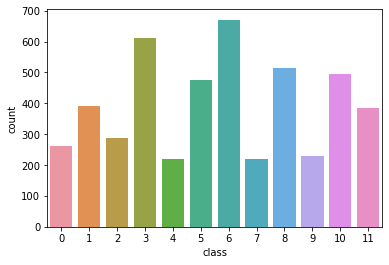

In [23]:
# Checking the distribution of classes in the dataset
sns.countplot(df['class']);

In [12]:
# Checking the size of 3 random images

image = PIL.Image.open('./train/Maize/006196e1c.png')
width, height = image.size
print(width, height)

image = PIL.Image.open('./train/Black-grass/dde665ea5.png')
width, height = image.size
print(width, height)

image = PIL.Image.open('./train/Black-grass/0050f38b3.png')
width, height = image.size
print(width, height)


856 856
723 723
196 196


In [13]:
# OBSERVATIONS:
    # The images are of different sizes, will resize them to a common dimension (maybe 196x196)

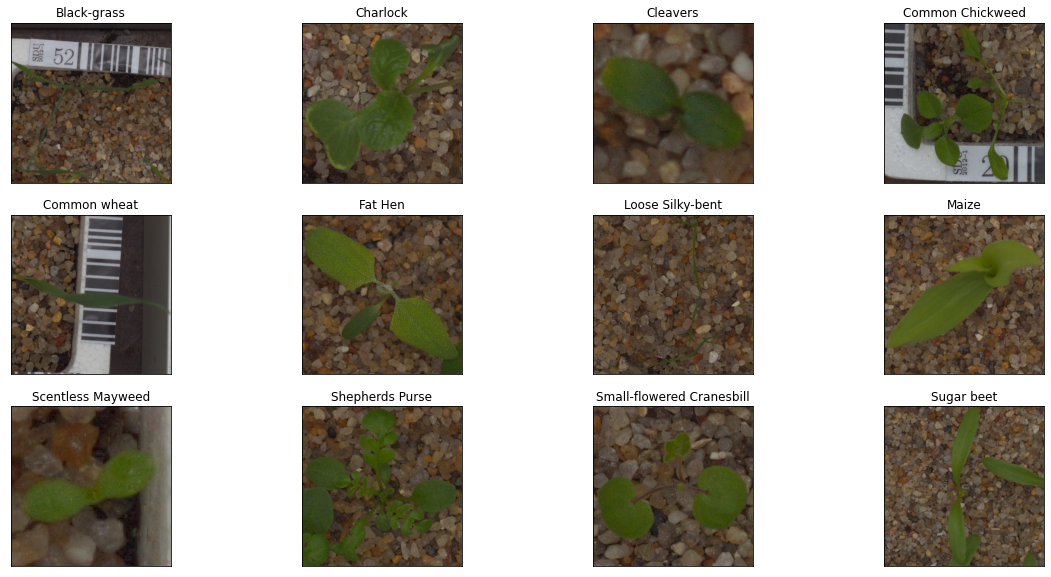

In [29]:
# Defining a function to display a random image from each class

def plot_img_per_class(dataframe):
    plt.figure(figsize=(20,10))
    for i in range(12):
        images = dataframe[dataframe['class']==i]['image_fn'].values
        index = np.random.choice(len(images))
        image = Image.open(images[index])
        plt.subplot(3,4,i+1)
        plt.imshow(image)
        plt.title(seed_class_nm[i])
        # Not using xticks or yticks, as this is not numerical data
        plt.xticks([])
        plt.yticks([])
        
        
plot_img_per_class(df)

### Buid high performing image classifier model

- Supervised ML
- NN
- CNN
- CNN with transfer learning

### ML algorithms (Supervised learning)

Approach:

    In ML algorithm every pixel is considered a feature, hence:
    - Resize the image to a smaller and same; say to 128x128 to reduce computations
    - convert image into an array

In [30]:
# Load and resize images

In [33]:
# Step 1 of approach outlined above
# Resizing the images

# empty list of images, will use this to store all images
image_list=[]    

# load & resize images
for file in df['image_fn']:
    image=cv2.imread(file)                         # load the image
    resized_image=cv2.resize(image,(128,128))     # resizing for a standard & small dimension 
    image_list.append(resized_image)              # Appending the image to the list

In [34]:
# Confirm the number of images and dimensions

np.array(image_list).shape

(4767, 128, 128, 3)

In [43]:
# # RGB values for every pixel in every image
# image_list 

# # RGB values for every pixel in the first image
# image_list[0]

# # RGB values for every pixel in the first row of the first image
# image_list[0][0]

# # RGB values for the first pixel in the first row of the first image
image_list[0][0][0]

array([87, 81, 83], dtype=uint8)

First pixel in first image has RGB value of R=87, G=81, B=83:

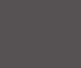

In [44]:
# Total images = 4767
# Images have been resized to 128*128, and all have 3 channels, each value contains RGB values of the pixel as 
# shown above

In [45]:
# Number of pixels in each image = H * W * No of channels = 128 * 128 * 3

In [46]:
# Step 2 of approach outlined above
# Converting the image into an array

X=np.array(image_list)

# Number of images = 4767, Number of pixels in each image = 49152 (128 * 128 * 3)
X=X.reshape(4767, 49152)                               # reshaping image into X variable
y=df['class']                                                # saving classes in y variable

# print shapes
X.shape, y.shape

((4767, 49152), (4767,))

In [47]:
# Total images = 4767
# No of pixesls in each image = 49152

In [48]:
# setting values for variables
random_s = 7
test_s = 0.3

In [49]:
# Split dataset into Training and Validation

# Splitting the Training dataset into the Training and Validation
# X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size = 0.2, random_state = 0)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_s, random_state=random_s)

# print training dataset shape
print('Training dataset shape:\n')
print(X_train.shape)
print(y_train.shape)

# print validation dataset shape
print('\nValidation dataset shape:\n')
print(X_val.shape)
print(y_val.shape)

Training dataset shape:

(3336, 49152)
(3336,)

Validation dataset shape:

(1431, 49152)
(1431,)


### Model classfiers

 - ML
 - NN
 - CNN
 - CNN with transfer learning

In [50]:
# ML Supervised: K-Nearest Neighbors

In [55]:
# Lets use a KNN classifier

# Initializing the model
knn = KNeighborsClassifier(n_neighbors = 1,algorithm = 'auto')

# Training the moedl
knn.fit(X_train, y_train)

# Getting the performance of the model (training data)
knn_score_t = knn.score( X_train, y_train)
print ("Accuracy: Training Dataset: ", knn_score_t)

# Performance on validation data
knn_score_v = knn.score( X_val, y_val)
print ("Accuracy: Validation Dataset: ", knn_score_v)

Accuracy: Training Dataset:  1.0
Accuracy: Validation Dataset:  0.26834381551362685


In [56]:
# BIG overfit, though other values are giving huge overfits as well

In [57]:
# ML Supervised: Random Forest

In [58]:
# Lets use a Random forest

# Initializing the model
rf = RandomForestClassifier()

# Training the model
rf.fit(X_train, y_train)

# Getting the performance of the model (training data)

rf_score_t = rf.score( X_train, y_train)
print ("Accuracy: Training Dataset: ", rf_score_t)

# Performance on validation data
rf_score_v = rf.score( X_val, y_val)
print ("Accuracy: Validation Dataset: ", rf_score_v)

Accuracy; Training Dataset:  1.0
Accuracy; Validation Dataset:  0.5024458420684835


In [59]:
# OBSERVATIONS:
    # KNN validation accuracy ~ 27%
    # Random Forest validation accuracy ~ 50%
    # Both models hugely overfit on the training data, perform really bad on validation data 
    # The standard ML model is not very good on images and a large number of features 
            # So I will not spend more time tuning the models or using ensembles

### NN Model

    Approach:
        - Don't need to reshape images into pixels
        - Convert to float to help with accuracy
        - One hot encoding to convert the class lables to categorical data
        - Split the dataset into training and validation
        - Build, compile, fit, evaluate NN

In [61]:
# Steps 1 and 2 of method shown above
# Array of images
X = np.array(image_list)
X = X.astype('float32')                # converting to float

# Classes
y = df['class']           
y = to_categorical(y)                  # one hot encoding to convert the class labels to categorical data

# images shapes
print (f"Shape of images: \n\t{X.shape}")

print(f"Shape of the classes: \n\t{y.shape}")


Shape of images: 
	(4767, 128, 128, 3)
Shape of the classes: 
	(4767, 12)


**`X data:`**
* `There are 4767 images of 128x128 pixels with 3 channels (RGB)`

**`y data:`**
* `There are 4767 images divided into 12 classes`

In [62]:
# Deleting unnecessary variables to save memory
del X_train, y_train, X_val, y_val

In [63]:
# Split dataset into Training and Validation

# Splitting the Training dataset into the Training and Validation

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_s, random_state=random_s)

# print training dataset shape
print('Training dataset shape\n')
print(X_train.shape)
print(y_train.shape)

# print validation dataset shape
print('\nValidation dataset shape\n')
print(X_val.shape)
print(y_val.shape)

Training dataset shape

(3336, 128, 128, 3)
(3336, 12)

Validation dataset shape

(1431, 128, 128, 3)
(1431, 12)


In [1]:
### Not sscaling the data as I am using Batch Normalization, still commenting out the code

# # As standard practice, let's Scale the data

# sc=StandardScaler()
# Xsc_train = sc.fit_transform(X_train) # fit and transform
# Xsc_val = sc.transform(X_val) # transform
# Xsc_test = sc.transform(X_test) # transform

In [65]:
#Initializing the NN

model_nn = Sequential()

In [67]:
# Add layer

inputs = Input(shape=(128,128,3))             # input layer
model_nn.add(Flatten())                       # Flatten layer to flatten the 2D image into 1 long vector

# 12 target classes means we will have 12 output neurons
# I want to start with 5 dense layers, hence starting with 2048 neurons with an idea to reduce ~50% each layer
 

model_nn.add(Dense(2048, kernel_initializer='uniform'))

model_nn.add(BatchNormalization())
model_nn.add(Activation('relu'))

model_nn.add(Dense(1024, kernel_initializer='uniform'))

model_nn.add(BatchNormalization())
model_nn.add(Activation('relu'))

model_nn.add(Dense(512, kernel_initializer='uniform'))

model_nn.add(BatchNormalization())
model_nn.add(Activation('relu'))

model_nn.add(Dense(256, kernel_initializer='uniform'))

model_nn.add(BatchNormalization())
model_nn.add(Activation('relu'))

model_nn.add(Dense(128, kernel_initializer='uniform'))
model_nn.add(BatchNormalization())
model_nn.add(Activation('relu'))

# adding softmax to get probabilities for 12 classes
model_nn.add(Dense(12,activation='softmax'))

In [68]:
# Compile & Fit the model
# Add early stop to help optimize performance & system resources

model_nn.compile(optimizer=optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=10, min_delta=0.01)

# Capture data for plotting
history = model_nn.fit(X_train, y_train, validation_data = (X_val, y_val), batch_size = 32, epochs = 100, 
                       verbose = 1, callbacks=[early_stop])

Epoch 1/100
105/105 [==============================] - 53s 466ms/step - loss: 2.3637 - accuracy: 0.2016 - val_loss: 3.3980 - val_accuracy: 0.1656
Epoch 2/100
105/105 [==============================] - 46s 436ms/step - loss: 1.5131 - accuracy: 0.4617 - val_loss: 2.3743 - val_accuracy: 0.2453
Epoch 3/100
105/105 [==============================] - 75s 712ms/step - loss: 1.1430 - accuracy: 0.6059 - val_loss: 2.3091 - val_accuracy: 0.2872
Epoch 4/100
105/105 [==============================] - 112s 1s/step - loss: 0.9049 - accuracy: 0.6786 - val_loss: 2.2007 - val_accuracy: 0.2998
Epoch 5/100
105/105 [==============================] - 131s 1s/step - loss: 0.6843 - accuracy: 0.7731 - val_loss: 2.4964 - val_accuracy: 0.3515
Epoch 6/100
105/105 [==============================] - 168s 2s/step - loss: 0.6279 - accuracy: 0.7913 - val_loss: 3.1686 - val_accuracy: 0.2858
Epoch 7/100
105/105 [==============================] - 192s 2s/step - loss: 0.4887 - accuracy: 0.8369 - val_loss: 2.9352 - val_acc

In [70]:
# Getting the score of the model on the validation data using score of last epoch
# Will use ModelChackpoint later on in this notebook

eval_r_nn = model_nn.evaluate(X_val, y_val)
print('Validation Accuracy: {}'.format(round(eval_r_nn[1]*100, 2), '%'))

45/45 [==============================] - 5s 99ms/step - loss: 4.0195 - accuracy: 0.3417
Validation Accuracy: 34.17


In [71]:
# Print the model summary report

model_nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 49152)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              100665344 
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
activation_1 (Activation)    (None, 1024)              0

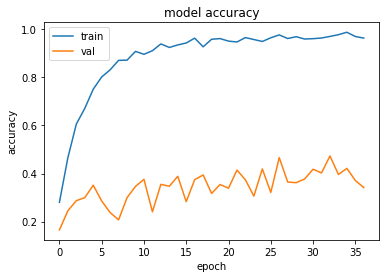

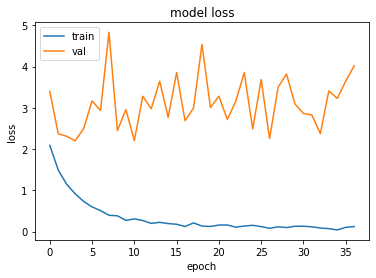

In [72]:
# Graphing the accuracy of the model and the loss 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
# OBSERVATIONS:
    # The validation accuracy is very poor, ~ 34%
    # This is expected as NN usually works better with controlled images, i.e. object in same position etc
    # The images in the same class have several variance
    # Instead of learning features, NN ends up learning too many details resulting in overfit
    # Hence, overfit the training data, and performs poorly on validation data

### CNN models

    Approach:
        - Try basic model and Transfer learning
        - Compare with / without checkpoint

In [73]:
# CNN Basic model

# notice batch normalization before activation function
# I will try with 4 layers & w/without dropout 0.2

#Initializing the model
model_cnn = Sequential()

# Adding layers
model_cnn.add(Conv2D(32, (5,5),  input_shape = (128, 128, 3))) 
model_cnn.add(MaxPooling2D(pool_size=3))
model_cnn.add(BatchNormalization())                   
model_cnn.add(Activation('relu'))


model_cnn.add(Conv2D(filters=64, kernel_size=4, padding='same'))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation('relu'))

model_cnn.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.2))

model_cnn.add(Conv2D(filters=128, kernel_size=2, padding='same'))
model_cnn.add(MaxPooling2D(pool_size=2))
model_cnn.add(BatchNormalization())
model_cnn.add(Activation('relu'))
model_cnn.add(Dropout(0.2))

# Flatten
model_cnn.add(Flatten()) 

# Dense / fully connected layer 
model_cnn.add(Dense(units = 500, activation = 'relu')) 
model_cnn.add(Dropout(0.2))

# output layer for 12 classes using softmax
model_cnn.add(Dense(units = 12, activation = 'softmax')) 


# # I also tried same without BatchNormalization, it performed poorly. Used below commands:
# model_cnn.add(Conv2D(32, (5,5), activation ='relu', input_shape = (128, 128, 3))) 
# model_cnn.add(MaxPooling2D(pool_size=3))

In [74]:
# Compile the model, using optimizer adam

model_cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
# Using checkpoint to save the best performing weights

early_stop = EarlyStopping(monitor='val_accuracy', patience=3, min_delta=0.01)
model_checkpoint = ModelCheckpoint('plant_classifier_cnn_weights.h5', monitor='val_loss', save_best_only=True)

# fit the model, capture data for plotting
# Notice callback parameter

history = model_cnn.fit(X_train,y_train,
          batch_size=64,
          epochs=20,
          verbose=1, shuffle=True, validation_data=(X_val,y_val), callbacks=[model_checkpoint, early_stop])

Epoch 1/20
53/53 [==============================] - 46s 861ms/step - loss: 0.8779 - accuracy: 0.7095 - val_loss: 2.0287 - val_accuracy: 0.3885
Epoch 2/20
53/53 [==============================] - 54s 1s/step - loss: 0.6361 - accuracy: 0.7851 - val_loss: 1.2491 - val_accuracy: 0.5926
Epoch 3/20
53/53 [==============================] - 51s 960ms/step - loss: 0.5203 - accuracy: 0.8147 - val_loss: 2.3158 - val_accuracy: 0.4514
Epoch 4/20
53/53 [==============================] - 51s 965ms/step - loss: 0.3687 - accuracy: 0.8669 - val_loss: 0.5804 - val_accuracy: 0.8008
Epoch 5/20
53/53 [==============================] - 53s 1s/step - loss: 0.2934 - accuracy: 0.8984 - val_loss: 0.8911 - val_accuracy: 0.6995
Epoch 6/20
53/53 [==============================] - 54s 1s/step - loss: 0.2516 - accuracy: 0.9146 - val_loss: 0.7774 - val_accuracy: 0.7519
Epoch 7/20
53/53 [==============================] - 60s 1s/step - loss: 0.2081 - accuracy: 0.9257 - val_loss: 1.0463 - val_accuracy: 0.6981


In [78]:
# Evaluate and print accuracy for validation dataset

eval_r_cnn = model_cnn.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(eval_r_cnn[1]*100, 2), '%'))

45/45 [==============================] - 8s 174ms/step - loss: 1.0463 - accuracy: 0.6981
Validation accuracy: 69.81


In [47]:
# OBSERVATIONS:
    # The accracy is ~70 %, much better than NN or ML
    # Will implement transfer learning now

#### CNN with transfer learning 

 - I will use the pre-trained model VGG16 which has been trained on Imagenet
 - I will use check point to save the best performing weights

In [79]:
# CNN - transfer learning

In [80]:
# import & set working baseline
    # import vgg16, initialize with weights = imagenet

from tensorflow.keras.applications.vgg16 import VGG16

model_x = VGG16(weights='imagenet', include_top=False,input_shape=(128,128,3))

58892288/58889256 [==============================] - 2s 0us/step


In [81]:
# Will be applying finetuning, so I am popping off the top 3 layers, and putting my own

model_x.layers.pop()
model_x.layers.pop()
model_x.layers.pop()

In [82]:
# Add custom layers / trainable layers

# 1, with vgg output as input
custom_layers = Conv2D(256, kernel_size=(3,3),strides=1)(model_x.layers[-1].output) 
custom_layers = BatchNormalization()(custom_layers)
custom_layers = Activation('relu')(custom_layers)    

#2
custom_layers = Conv2D(128, kernel_size=(2,2),strides=1)(custom_layers)
custom_layers = BatchNormalization()(custom_layers)
custom_layers = Activation('relu')(custom_layers)

#3
custom_layers = Flatten()(custom_layers)
custom_layers = Dense(12, activation='softmax')(custom_layers)

In [83]:
# Create the complete model
model_x=Model(model_x.input,custom_layers)

In [84]:
# Make custom layers only as trainable, other are already pre-trained VGG layers 
for layer in model_x.layers[:15]:
    layer.trainable = False

In [85]:
# Compile the model

model_x.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# print summary report
model_x.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [86]:
# Using checkpoint to save the best performing weights

model_checkpoint = ModelCheckpoint('cnnX_weights.h5', monitor='val_loss', save_best_only=True)

# fit the model, capture data for plotting
# Notice callback parameter

history = model_x.fit(X_train,y_train,
          batch_size=64,
          epochs=20,
          verbose=1, shuffle=True, validation_data=(X_val,y_val), callbacks=[model_checkpoint])

Epoch 1/20
53/53 [==============================] - 555s 11s/step - loss: 1.8503 - accuracy: 0.4024 - val_loss: 6.9565 - val_accuracy: 0.2635
Epoch 2/20
53/53 [==============================] - 776s 15s/step - loss: 0.5962 - accuracy: 0.7986 - val_loss: 3.1649 - val_accuracy: 0.3871
Epoch 3/20
53/53 [==============================] - 798s 15s/step - loss: 0.3611 - accuracy: 0.8758 - val_loss: 1.1144 - val_accuracy: 0.6660
Epoch 4/20
53/53 [==============================] - 1095s 21s/step - loss: 0.2669 - accuracy: 0.9181 - val_loss: 1.2373 - val_accuracy: 0.6765
Epoch 5/20
53/53 [==============================] - 956s 18s/step - loss: 0.2543 - accuracy: 0.9172 - val_loss: 0.9540 - val_accuracy: 0.6883
Epoch 6/20
53/53 [==============================] - 52840s 1016s/step - loss: 0.2353 - accuracy: 0.9285 - val_loss: 0.7960 - val_accuracy: 0.7421
Epoch 7/20
53/53 [==============================] - 715s 14s/step - loss: 0.1451 - accuracy: 0.9578 - val_loss: 0.6269 - val_accuracy: 0.8225
E

In [87]:
# Evaluate and print accuracy for validation dataset

eval_r_Xcnn = model_x.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(eval_r_Xcnn[1]*100, 2), '%'))

45/45 [==============================] - 238s 5s/step - loss: 0.4902 - accuracy: 0.8756
Validation accuracy: 87.56


In [88]:
# OBSERVATIONS:
    # Performance accuracy with base CNN model ~ 70%
    # Performing accuracy with transfer learning ~ 88%
    # By using callbacks = model_checkpint, we have saved the best performing weights / Epoch
    # I will load the saved weights and validate

In [89]:
# Load the saved weights to the model

model_x.load_weights('cnnX_weights.h5')

In [90]:
# Evaluate and print accuracy for validation dataset

eval_r_XWcnn = model_x.evaluate(X_val, y_val)
print('Validation accuracy: {}'.format(round(eval_r_XWcnn[1]*100, 2), '%'))

45/45 [==============================] - 788s 18s/step - loss: 0.4443 - accuracy: 0.8966
Validation accuracy: 89.66


In [91]:
# OBSERVATIONS:
    # With best performing weights, The Accuracy with transfer learning &increased to ~80%.

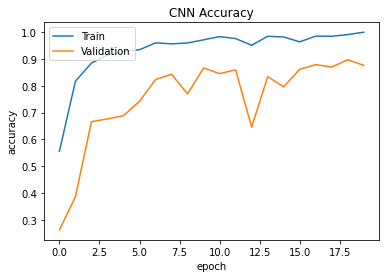

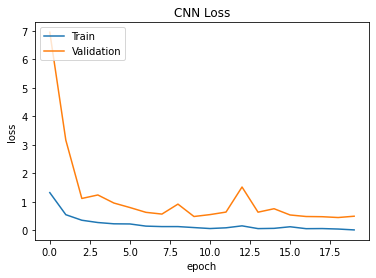

In [92]:
# Let's check how accuracy and loss fluctuated over the epochs

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

#### CONCLUSION

##### We tried to classify using three techniques:
    1) Machine learning; Accuracy (KNN) = 0.27%
    2. Machine learning; Accuracy (Random Forest) = 0.50%
    2) Neural Networks; Accuracy = 34%
    3) Convolutional Neural Networks ; Accuracy = 70%
    4) Convolutional Neural Networks with transfer learning ; Accuracy = 88%

ML models:
K-NN performed very poorly, maybe because, even to the human eye, all the images look the same, the neighbors are packed really close, meaning 2 images of the same plant can be relatively very far apart if the image was taken from a different angle

RF performed btter, even better than the basic Neural Network

Out of Neural Networks:
The Basic Neural Network model performed the worst, perhaps it is learning too much of the details resulting in overfit for training dataset and performing poorly on validation set.

CNN's are best suited for such images datasets. This works even better and faster when applied Transfer learning.

CNN with transfer learning is the best approach for such dataset.


Next Step:
    - Save the model that used Transfer Learning from VGG16
    - Used saved model to predict given image

In [95]:
# save the model
# Notice h5 extension

model_x.save("plant_classifier.h5")

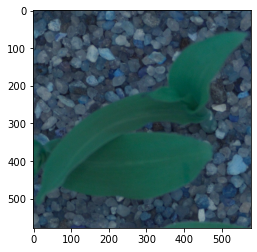

In [99]:
# Read and display the image to predict

img_2_predict = cv2.imread('Predict.png')
plt.imshow(img_2_predict)

In [100]:
# Pre-processing before using the model to predict

from tensorflow.python.keras.preprocessing.image import image, load_img


predict_img=[]
img_2_predict=image.load_img('Predict.png',target_size=(128,128))
img_2_predict=image.img_to_array(img_2_predict)
predict_img.append(img_2_predict) 
predict_img=np.array(predict_img)    

np.array(predict_img).shape

(1, 128, 128, 3)

In [101]:
from tensorflow.keras.applications.vgg16 import preprocess_input
predict_img=preprocess_input(np.array(predict_img))

In [102]:
# Loading the saved model weights, and predicting the image
from keras.models import load_model

model = load_model("plant_classifier.h5")

# Predicting the image
pred=model.predict(predict_img)
np.set_printoptions(suppress=True)

# Printing the prediction
print(pred)

[[0.00000042 0.00000126 0.00000001 0.00000064 0.00000027 0.00000458
  0.00000008 0.99999094 0.         0.         0.00000011 0.0000017 ]]


In [103]:
# We can even print what the seedling species is based on the label number
plant_names = ["Black-grass", "Charlock", "Cleavers", "Common Chickweed", "Common wheat", "Fat Hen", "Loose Silky-bent",
"Maize", "Scentless Mayweed", "Shepherds Purse", "Small-flowered Cranesbill", "Sugar beet"]
# The order of the plants have been taken from the kaggle dataset website itself

pred_ind = np.argmax(pred)
pred_final = plant_names[pred_ind]
print(f"The prediction is....\n{pred_final.upper()}!!!")

The prediction is....
MAIZE!!!


In [104]:
# OBSERVATIONS:
    # The model has predicted the test image as maize, with a probability of 0.99999094

### END OF PROJECT 
August 7, 2021